# Social network analysis

In this workshop, we will use networkx to create a network from text data, and we will then do some simple analysis on it using Gephi and networkx. 


### Creating simple networks with networkx 

Let's start by learning how to create and plot simple networks with networkx. 

Networkx is a powerful library for creating and analyzing social networks using Python.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt 

To create a network, we use networkx to add nodes and edges between them.

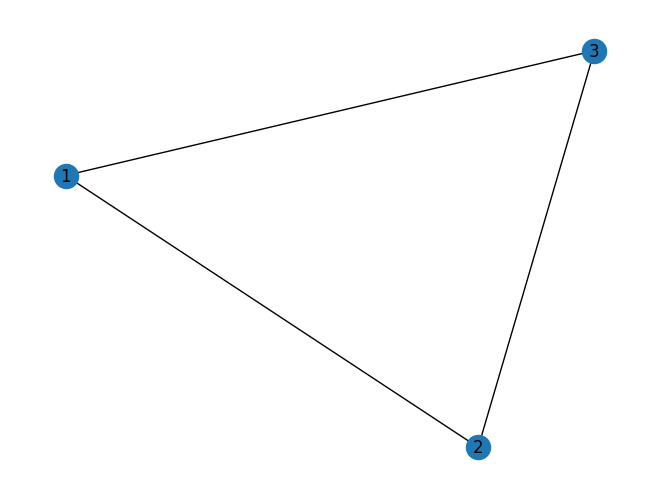

In [2]:
# A very simple graph

# Create a graph 
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3])

# Add edges
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Plot the graph
nx.draw(G, with_labels=True)

plt.show()


In [9]:
# We can then examine the graph: 
print("Let's find things out about our graph!")
print(f"Nodes: {G.nodes}")
print(f"Edges: {G.edges}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed?: {G.is_directed()}")
print(f"Network density: {nx.density(G)}")
print(f"Node degrees: {G.degree()}")
print(f"Number of components: {len(list(nx.connected_components(G)))}")
print(f"Components: {list(nx.connected_components(G))}")
print(f"Is node 1 and 3 connected? {G.has_edge(1,3)}")



Let's find things out about our graph!
Nodes: [1, 2, 3]
Edges: [(1, 2), (1, 3), (2, 3)]
Number of nodes: 3
Number of edges: 3
Is the graph directed?: False
Network density: 1.0
Node degrees: [(1, 2), (2, 2), (3, 2)]
Number of components: 1
Components: [{1, 2, 3}]
Is node 1 and 3 connected? True


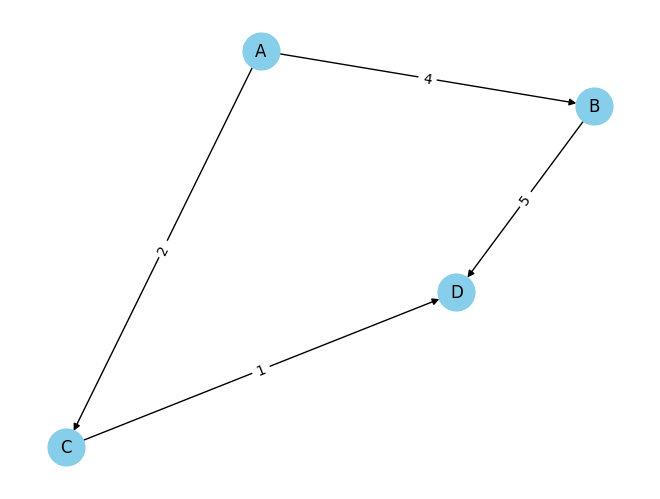

In [10]:
# Here we create a directed graph, with weights on the edges
DG = nx.DiGraph()

# Add nodes
DG.add_nodes_from(['A', 'B', 'C', 'D'])

# Add edges with labels
DG.add_edge('A', 'B', weight=4)
DG.add_edge('A', 'C', weight=2)
DG.add_edge('B', 'D', weight=5)
DG.add_edge('C', 'D', weight=1)

# Plot the graph with edge labels
pos = nx.spring_layout(DG)
nx.draw(DG, pos, with_labels=True, node_size=700, node_color='skyblue')
nx.draw_networkx_edge_labels(DG, pos, edge_labels={(u, v): d['weight'] for u, v, d in DG.edges(data=True)})
plt.show()

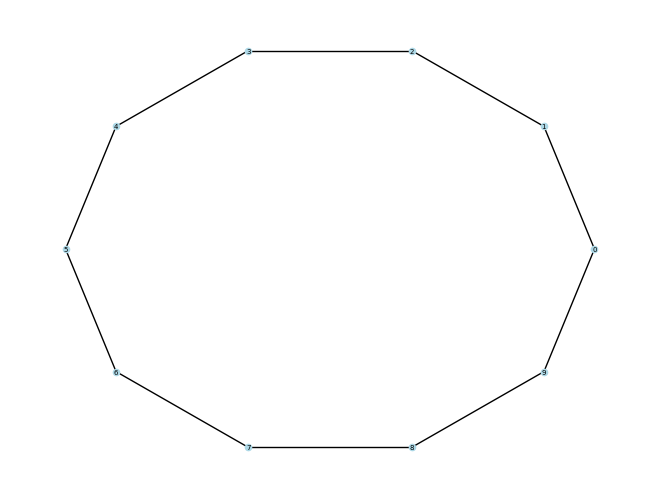

In [ ]:
# We can generate the graphs with simple algorithms: for instance, we can make a little circle network:

import random

num_nodes = 10 
# This is code creates a simple circular network, were each node is connected to their neighbors 
# Create an empty graph
G = nx.Graph()

# Add nodes and edges to create a circular network
for i in range(num_nodes):
    G.add_node(i)
    G.add_edge(i, (i + 1) % num_nodes)  # Connect each node to its neighbor, using modulo for circular connection
    

# Draw the network
nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=20, font_size=5)
plt.show()



### Exercise 1: Generate a simple network 
Your task is to generate a network representing the friendships between "Alice", "Bob", "Carol" and "Dan". 

Everyone is friends with Alice. And Bob is friends with Carol, and Carol is friends with Dan.

The names should be their labels.

Plot the resulting network.


In [ ]:
# [Your code here]

## Simple network measures with networkx

We can also use networkx to measure relevant properties of social networks, such as those we learned during the lecture.

Networkx comes with some common example networks, such as the Karate Club network that we've already heard of. 

We can use networkx to calculate some important features of this network.

In [27]:

# Number of nodes
num_nodes = G.number_of_nodes()

# Number of edges
num_edges = G.number_of_edges()

# Density
density = nx.density(G)

# Average clustering coefficient
avg_clustering = nx.average_clustering(G)

# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Print the results
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Density:", density)
print("Average clustering coefficient:", avg_clustering)
print("Degree centrality:", degree_centrality)

Number of nodes: 34
Number of edges: 78
Density: 0.13903743315508021
Average clustering coefficient: 0.5706384782076823
Degree centrality: {0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


Let's identify the node with the highest eigenvector centrality. 

In [28]:
# Calculate eigenvector centrality for each node
eigenvector_centralities = nx.eigenvector_centrality(G)

# Find the node with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centralities, key=eigenvector_centralities.get)

# Get the eigenvector centrality value of the node
max_eigenvector_centrality = eigenvector_centralities[max_eigenvector_node]

# Print the node with the highest eigenvector centrality and its centrality value
print("Node with the highest eigenvector centrality:", max_eigenvector_node)
print("Eigenvector centrality value:", max_eigenvector_centrality)

Node with the highest eigenvector centrality: 33
Eigenvector centrality value: 0.37337121301323506


Let's plot the network in a way that shows some of these attributes. 

We can make the size of the nodes proportional to their degree (i.e., number of edges), and we can plot the node with highest eigenvector centrality in red.

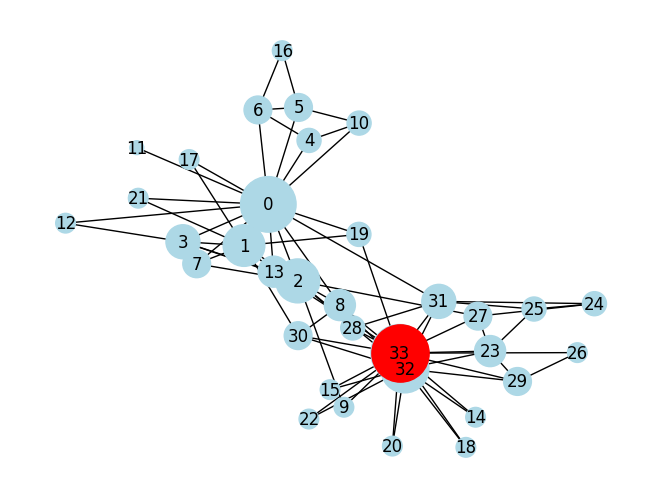

In [30]:
# Load the Karate Club network
G = nx.karate_club_graph()

# Calculate degree for each node
node_degrees = dict(G.degree())

# Calculate node sizes proportional to their degree
node_sizes = [v * 100 for v in node_degrees.values()]

# Plot the network
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color="lightblue", font_size=12)

# Draw the node with highest eigenvector centrality in red
nx.draw_networkx_nodes(G, pos, nodelist=[max_eigenvector_node], node_size=node_sizes[max_eigenvector_node], node_color='red')

plt.show()


### Exercise 2:
Adapt the code above so the size of the nodes depends on their eigenvector centrality instead of their degree. What difference do you observe?


In [ ]:
# [YOUR CODE HERE]

# Extracting social networks from real-world data

In your own project, you are unlikely to come across ready-to-process data in a format that you can open with networkx or Gephi. Instead, you need to create network from your own data.

In this exercise, we will go from data in a dataframe to creating a network.

In this case, we will look at a classic dataset: the Enron emails. The Enron email dataset is a large collection of email data from mostly senior management of the Enron Corporation. It was made public by the Federal Energy Regulatory Commission during its investigation after Enron's collapse in 2001. The dataset contains roughly half a million emails organized into folders. It's one of the largest datasets of real-world emails available for public study and has been widely used for research in various fields like social network analysis, natural language processing, and machine learning.

The Enron dataset is particularly notable for its insights into corporate communications and behaviors, and it has played a significant role in advancing the study of information processing and management. Due to its real-world nature, including the variety of topics and the informal style of communication, the dataset presents unique challenges and opportunities for data analysis and has become a benchmark in the study of electronic communications.

We will here use the dataset to create a social network of emails between individuals, and we will analyze the structure of this network.

The Enron case led to the conviction of two managers: Kenneth Lay (kenneth.lay@enron.com) and Jeffrey Skilling (jeffreyskilling@yahoo.com). We will examine the centrality of these nodes in the network, and identify the community to which they belong. 

To make the analysis more feasible, we will focus on emails in December 2001 - the month when the company when under.

In [11]:
import pandas as pd


In [15]:
df = pd.read_csv('enron_emails_december.csv.gz')

In [16]:
df.head()

,message
0,Message-ID: <21543395.1075855374340.JavaMail.e...
1,Message-ID: <25363451.1075855374674.JavaMail.e...
2,Message-ID: <8030945.1075855374698.JavaMail.ev...
3,Message-ID: <20180566.1075855374772.JavaMail.e...
4,Message-ID: <6589757.1075855374796.JavaMail.ev...


As you can see, the email is just a long text message. We need to parse out the actual data and email addresses from the text using regexps.

In [17]:
print(df.sample(1).message.values)

["Message-ID: <23964205.1075861143260.JavaMail.evans@thyme>\nDate: Wed, 12 Dec 2001 06:31:27 -0800 (PST)\nFrom: glen.hass@enron.com\nTo: gregory.porter@enron.com, bill.rapp@enron.com, kay.miller@enron.com, \n\trobert.kilmer@enron.com, teb.lokey@enron.com, lindy.donoho@enron.com, \n\tsteven.harris@enron.com, lorraine.lindberg@enron.com, \n\ttk.lohman@enron.com, michelle.lokay@enron.com, \n\tmark.mcconnell@enron.com, kimberly.watson@enron.com, \n\tpaul.y'barbo@enron.com\nSubject: SoCal Unbundling\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Hass, Glen </O=ENRON/OU=NA/CN=RECIPIENTS/CN=GHASS>\nX-To: Porter, J. Gregory </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Gporter>, Rapp, Bill </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Brapp>, Miller, Mary Kay </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Mkmiller>, Kilmer III, Robert </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Rkilmer>, Lokey, Teb </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Tlokey>, Donoho, Lindy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=

In [18]:
import re

from_pattern = r"From: ([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,})"
to_pattern = r"To: ([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,})"

def extract_subject(message):
    # Regular expression pattern to match the subject line
    pattern = r'^Subject: (.+)$'

    # Search for the pattern in the message, using multiline mode
    match = re.search(pattern, message, re.MULTILINE)

    # Return the subject if a match is found, else return None
    return match.group(1) if match else None

# Example: this function extracts a date from the email
def extract_date(message):
    match = re.search(r"Date: .*?, (\d+ \w+ \d{4})", message)
    return match.group(1) if match else None

def extract_from(text):
    # Extracting email addresses
    from_email = re.search(from_pattern, text)
    if from_email:
        return from_email.group(1)
    else: 
        return None

def extract_to(text):
    to_emails = re.search(to_pattern, text)
    if to_emails:
        return to_emails.group(1)
    else: 
        return None   

# Extract and convert date
df['date'] = df['message'].apply(extract_date)
# Convert string to to date!
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d %b %Y')

#Extract the subject
df['subject'] = df['message'].apply(extract_subject)




### Exercise 2: Extract network from emails

In [7]:
#Your task is to extract from and to email, and to put these as new columns "from_email" and "to_email"
# Regular expression patterns for "From", "To" email addresses. We ignore CC here for simplicity
# Follow the same pattern as df['subject'] = df['message'].apply(extract_subject) above.
 
# [YOUR CODE HERE]

# The resulting dataframe should look as follows:
# message | date | from_email | to_email


Next step: Now that we have the date and the from and to emails, we want to aggregate on the from and to, so that we get the number of emails sent between the two emails.

We can now count the number of occurrences of each combination of from_email and to_email, to identify the strenght of the link.

In [39]:
email_edges = df.groupby(['from_email','to_email']).count()['message'].reset_index().rename(columns={'message':'count'})

In [40]:
email_edges

,from_email,to_email,count
0,1.10969419.-2@multexinvestornetwork.com,harry.arora@enron.com,6
1,1.10969419.-3@multexinvestornetwork.com,harry.arora@enron.com,1
2,1.12714936.-2@multexinvestornetwork.com,brapp@enron.com,3
3,1.3966.ee-uoqz1t2kh4u7.1@mailer.realage.com,brapp@enron.com,1
4,1.3992.38-yanwsdx2psuj.1@mailer.realage.com,brapp@enron.com,1
...,...,...,...
4919,ze.powergroup.inc.@mailman.enron.com,vkamins@ect.enron.com,2
4920,zelda.paschal@enron.com,teb.lokey@enron.com,1
4921,zhiyong.wei@enron.com,kam.keiser@enron.com,1
4922,zkhokher@ivey.uwo.ca,vkamins@enron.com,1


### Create networkx graph from data 
In the next step, we're going to create a networkx graph from this data, and save to have a look at the graph in Gephi.

In [42]:
# With add_node, we can add additional data to the node that is stored in the network as attributes.
# E.g., Use G.add_node(id, additional_data="data")

G = nx.Graph()

In [43]:
#First, we create the nodes. We give them as their names the actual email addresses
# We list all the unique to and from emails. We can use sets for this!

# We also add an attribute to keep track of the two individuals who were convicted to prison in the Enron scandal: Kenneth Lay, and Jeffrey Skilling

for email in list(set(email_edges['from_email']).union(email_edges['to_email'])):
    G.add_node(email, convicted=(True if email in ['kenneth.lay@enron.com','jeffreyskilling@yahoo.com'] else False))


In [44]:
#We then loop over each connection and add it as an edge!
for f, t, w in zip(email_edges['from_email'],email_edges['to_email'],email_edges['count']):
    G.add_edge(f,t,weight=w)

In [48]:
print(f"There are {len(G.nodes)} nodes in the network")

There are 2554 nodes in the network


#### Getting the giant component
Before working with the network, we should remove nodes that aren't connected to the larger network. If we have multiple components, much of network analysis isn't going to work.

We therefore select the Giant Component.


In [47]:
# Get all the components of the graph
components = sorted(nx.connected_components(G), key=len, reverse=True)
print(f'There are {len(components)} components')

# The giant component is the first element in the sorted list
giant_component = components[0]
G = G.subgraph(giant_component)

There are 423 components


In [49]:
print(f"There are now {len(G.nodes)} nodes in the network")

There are 2554 nodes in the network


Now, let's try to  plot the network! It might take a while.

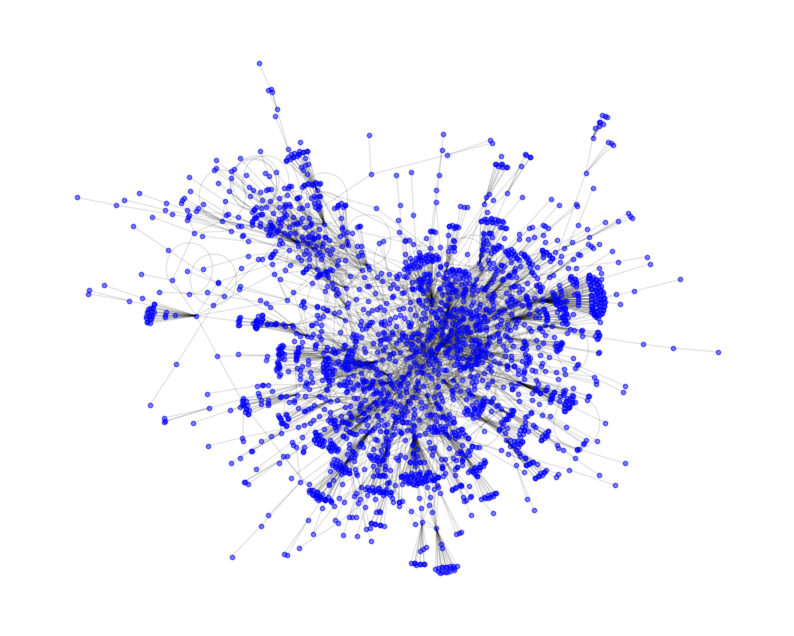

In [50]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
pos = nx.spring_layout(G)  # or choose another layout algorithm suitable for your graph
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='blue', alpha=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.axis('off')  # Turn off axis
plt.show()

### Let's learn more about the network! 

### Exercise 4: Measure network properties

Let's identify the same attributes of the network as we did for the Karate network earlier!

In [51]:
# [YOUR CODE HERE]

# Print the results
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Density:", density)
print("Average clustering coefficient:", avg_clustering)


Number of nodes: 2554
Number of edges: 3804
Density: 0.0011668063828357996
Average clustering coefficient: 0.05620313212644599


## Save the network, open with Gephi, and carry out Visual Network Analysis
We can now save the network as a file, so that we can open it with Gephi and analyze it.

There are several fileformats that we can save in, that are compatible with Gephi. GEXF and GraphML are two common formats. You can read more about the formats and their pros/cons on this website: https://networkx.org/documentation/stable/reference/readwrite/index.html 



In [119]:
nx.write_gexf(G,'enron_network.gexf')

In [ ]:
# If the network is too large to deal with on your laptop, you might want to filter out small nodes.
N=4

# Filter nodes with degree less than N
filtered_nodes = [node for node, degree in G.degree() if degree >= N]

# Create a new graph with the filtered nodes
filtered_graph = G.subgraph(filtered_nodes).copy()

Now open this file with Gephi and use it to create a better plot of the network!

See if you can figure out the different communities, and what charaterizes them. Feel free to use google to search the emails and names!

# Solutions

### Solution 1
<a id='solution1'></a>

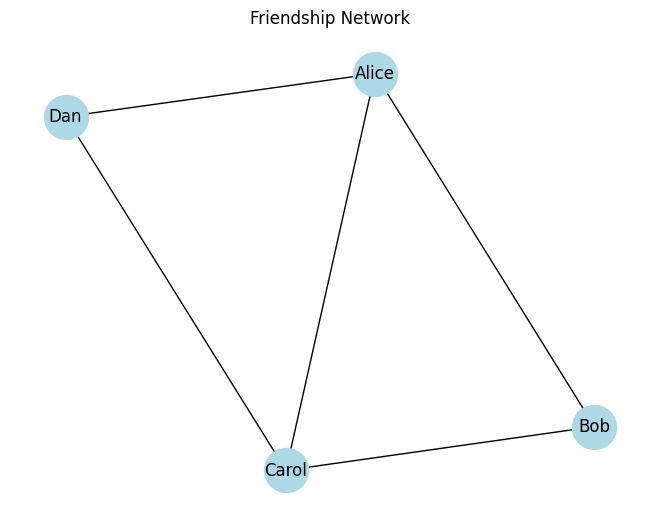

In [22]:
# Create a graph
G = nx.Graph()

# Add nodes
nodes = ["Alice", "Bob", "Carol", "Dan"]
G.add_nodes_from(nodes)

# Add edges representing friendships
edges = [("Alice", "Bob"), ("Alice", "Carol"), ("Alice", "Dan"), ("Bob", "Carol"), ("Carol", "Dan")]
G.add_edges_from(edges)

# Plot the network
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=12)
plt.title("Friendship Network")
plt.show()

## Solution 2

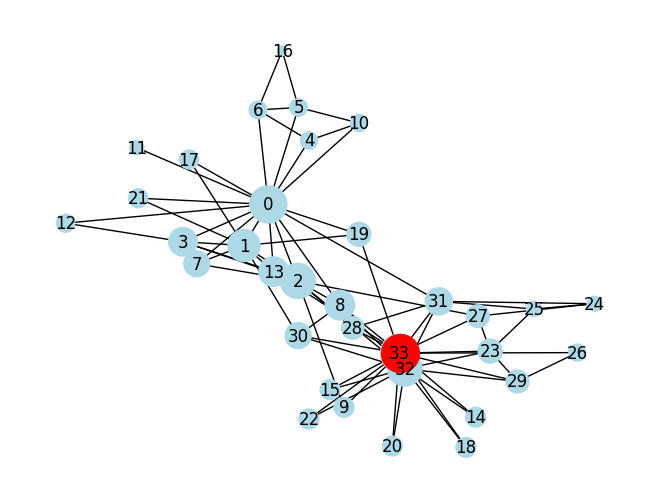

In [33]:
# Load the Karate Club network
G = nx.karate_club_graph()

# Calculate degree for each node
node_eigs = dict(nx.eigenvector_centrality(G))

# Calculate node sizes proportional to their degree
node_sizes = [v * 2000 for v in node_eigs.values()]

# Plot the network
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color="lightblue", font_size=12)

# Draw the node with highest eigenvector centrality in red
nx.draw_networkx_nodes(G, pos, nodelist=[max_eigenvector_node], node_size=node_sizes[max_eigenvector_node], node_color='red')

plt.show()


## Solution 3

In [38]:

df['from_email'] = df['message'].apply(extract_from)
df['to_email'] = df['message'].apply(extract_to)